In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

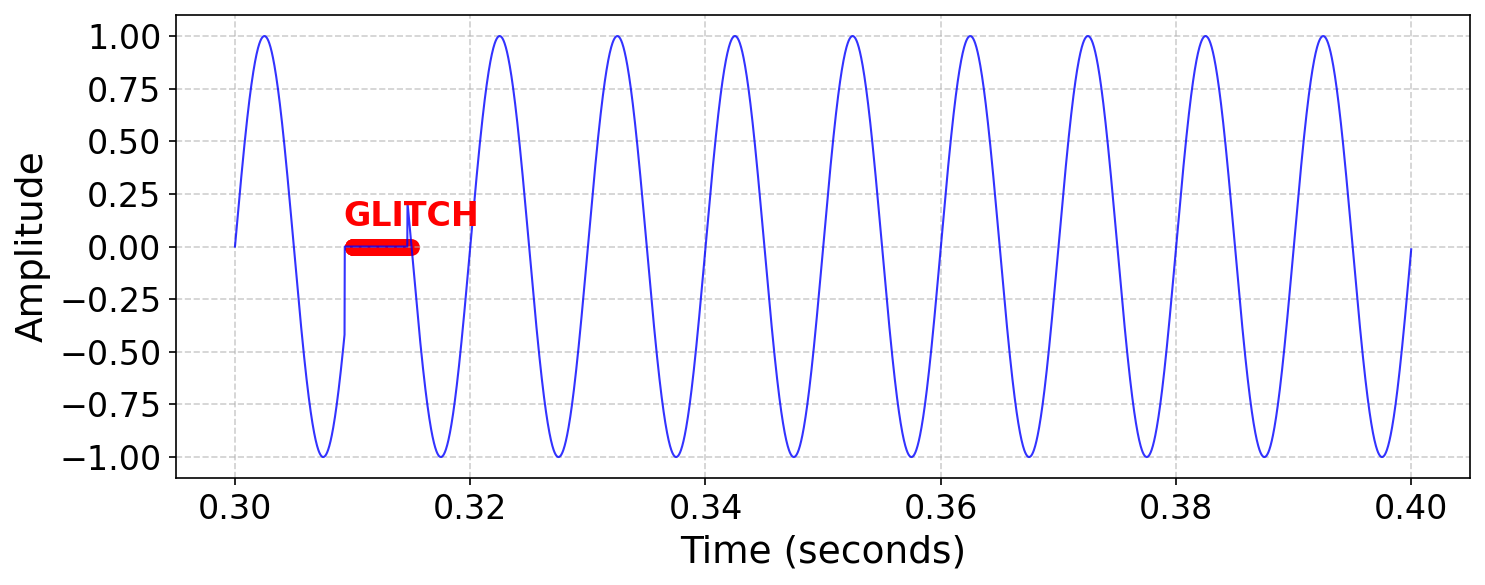

In [15]:
# Load an audio file (replace 'your_audio_file.wav' with your actual file)
audio_path = '10drop_buffersize256.wav'
y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

# Define time range (in seconds)
start_time = 0.3
end_time = 0.4

# Convert time to sample index
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Extract the segment
y_segment = y[start_sample:end_sample]
time_segment = np.linspace(start_time, end_time, num=len(y_segment))

# Identify glitch points (where amplitude is 0) ONLY in the range 0.3 to 0.32 seconds
glitch_mask = (time_segment >= 0.31) & (time_segment <= 0.32)
glitch_indices = np.where((y_segment == 0) & glitch_mask)[0]
glitch_times = time_segment[glitch_indices]

# Plot the waveform for the extracted segment
plt.figure(figsize=(10, 4), dpi=150)
plt.plot(time_segment, y_segment, color="b", alpha=0.8, linewidth=1)

# Highlight glitch points (only in 0.3 - 0.32s range)
plt.scatter(glitch_times, np.zeros_like(glitch_times), color='red', s=50, label='GLITCH')
plt.annotate("GLITCH", (gt, 0), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16, fontweight='bold', color='red')

# Labels with bigger font
plt.xlabel("Time (seconds)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)

# Improve readability
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()
